In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
thera_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [65]:
thera_df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [66]:
thera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [67]:
thera_df.shape

(5000, 14)

<font color = 'blue'>
<li>14 columns in dataframe, 5000 rows in dataframe
<li>All columns are int datatype except CCAvg which is float


In [68]:
thera_df.skew()

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [69]:
thera_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [70]:
print('Number of unique in each column is\n' ,thera_df.nunique())

Number of unique in each column is
 ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


In [71]:
# ID has 5000 unique values and can be used as index
thera_df.set_index('ID', inplace=True)
thera_df.shape


(5000, 13)

In [72]:
thera_df.describe().T

count          mean          std     min      25%  \
Age                 5000.0     45.338400    11.463166    23.0     35.0   
Experience          5000.0     20.104600    11.467954    -3.0     10.0   
Income              5000.0     73.774200    46.033729     8.0     39.0   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.0   
Family              5000.0      2.396400     1.147663     1.0      1.0   
CCAvg               5000.0      1.937938     1.747659     0.0      0.7   
Education           5000.0      1.881000     0.839869     1.0      1.0   
Mortgage            5000.0     56.498800   101.713802     0.0      0.0   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.0   
Securities Account  5000.0      0.104400     0.305809     0.0      0.0   
CD Account          5000.0      0.060400     0.238250     0.0      0.0   
Online              5000.0      0.596800     0.490589     0.0      0.0   
CreditCard          5000.0      0.294000     0.455637     0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIP Code            93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal Loan           0.0      0.0      1.0  
Securities Account      0.0      0.0      1.0  
CD Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

<font color = 'Blue'>
<li>ID is not needed for the model, it has 5000 unique values we use it as the df index. The df now has 13 columns</li>
<li>Categorical variables seem to be: Family, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard </li>
<li>Some of the columns above seem to be skewed - however we will inspect this separately for categorical and continuous columns</li>
<li>In particular ZIP Code is entered as int and has a skew of -12.5 but it is clearly a categorical variable and with 467 unique values we can't do one hot encoding for it-probably need to drop this. ZIP Code should possibly be binned into categories such as low/medium/high income but we dont have data for this.</li>
<li>Negative values in Experience is not possible (min of -3.0) - need to clean this</li>


In [73]:
categorical_cols = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']
non_categorical_cols = [x for x in list(thera_df.columns) if x not in categorical_cols]
print('categorical cols are:', categorical_cols)
print('non categorical cols are: ', non_categorical_cols)

categorical cols are: ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']
non categorical cols are:  ['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


In [74]:
thera_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [75]:
thera_df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<font color='Blue'>
<li>All columns are int except CCAvg which is float</li>
<li>No null values in the dataset</li>


In [76]:
#Set Categorical columns to dtype categorical
for column in categorical_cols:
    thera_df[column] = thera_df[column].astype('category')

thera_df.dtypes

Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [77]:
display(thera_df['Personal Loan'].value_counts())
df_target_split0 = thera_df['Personal Loan'].value_counts()[0]/thera_df.shape[0]
print('Distribution of target variable values in dataset: 0:{:.3f}%, 1:{:.3f}%'.format(df_target_split0, 1-df_target_split0))

0    4520
1     480
Name: Personal Loan, dtype: int64

Distribution of target variable values in dataset: 0:0.904%, 1:0.096%


<font color = 'blue'>
<li>~10% of target is 1, rest is 0 across the dataset</li>
<li>Data is skewed with respect to the target variable but we leave it as it is</li>


### Inspect Categorical columns

In [78]:
#Value counts (normalized for categorical cols)
for column in categorical_cols:
    display(thera_df[column].value_counts(normalize=True).sort_index())

1    0.2944
2    0.2592
3    0.2020
4    0.2444
Name: Family, dtype: float64

1    0.4192
2    0.2806
3    0.3002
Name: Education, dtype: float64

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

0    0.4032
1    0.5968
Name: Online, dtype: float64

0    0.706
1    0.294
Name: CreditCard, dtype: float64

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

<font color ='blue'>
<li> Inspecting the values of the categorical columns confirms that these are indeed categorical</i>
<li>Of the categorical columns:</li>
<li>Securities Account, CD Account, Online, CreditCard and Personal Loan are binary</li>
<li>Family and Education have values of 1,2,3,4 and 1,2,3 respectively</li>


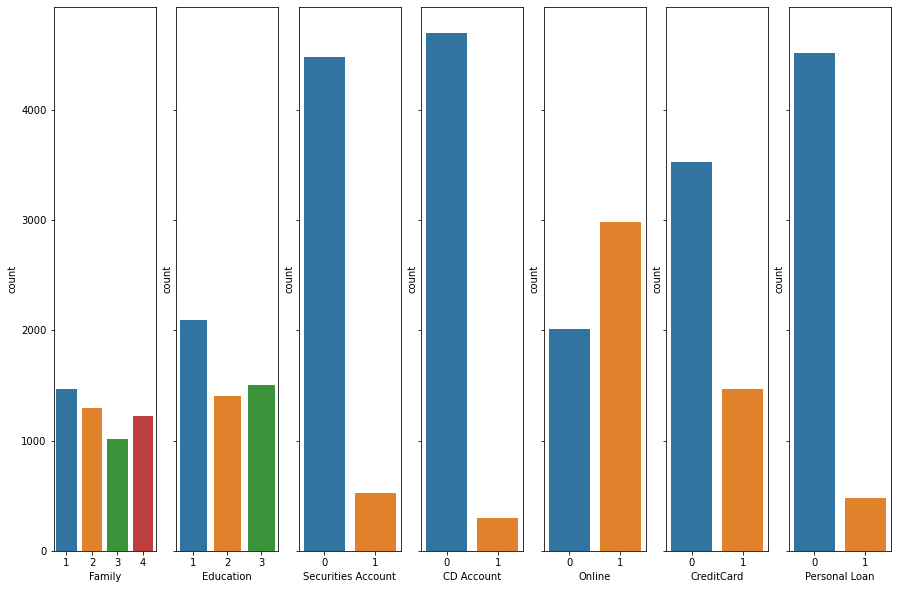

In [79]:
fig, axes = plt.subplots(1,len(categorical_cols),figsize=(15,10), sharex=False, sharey=True)
for i, column in enumerate(categorical_cols):
    #print(i,column)
    sns.countplot(thera_df[column],ax = axes[i])

In [80]:
thera_df[categorical_cols].skew().sort_values()

Series([], dtype: float64)

<font color = 'blue'>
<li>Family, Education, Online  are relatively well distributed across their values</li>
<li> Securities Account, CD Account, Personal Loan and Credit card are relatively more skewed</li>
<li>However none of these need any treatment for this - expected to have skewed values in bank customer data</li>


### Inspect Non Categorical Columns

In [81]:
# Which columns have zeros
print('Following columns have zeroes:')
thera_df.loc[:,non_categorical_cols].apply(lambda x: x.isin([0]).any())

Following columns have zeroes:


Age           False
Experience     True
Income        False
ZIP Code      False
CCAvg          True
Mortgage       True
dtype: bool

In [82]:
print('no of uniques in columns:')
thera_df.loc[:,non_categorical_cols].nunique()

no of uniques in columns:


Age            45
Experience     47
Income        162
ZIP Code      467
CCAvg         108
Mortgage      347
dtype: int64

In [83]:
thera_df.loc[:,non_categorical_cols].describe().T

count          mean          std     min      25%      50%  \
Age         5000.0     45.338400    11.463166    23.0     35.0     45.0   
Experience  5000.0     20.104600    11.467954    -3.0     10.0     20.0   
Income      5000.0     73.774200    46.033729     8.0     39.0     64.0   
ZIP Code    5000.0  93152.503000  2121.852197  9307.0  91911.0  93437.0   
CCAvg       5000.0      1.937938     1.747659     0.0      0.7      1.5   
Mortgage    5000.0     56.498800   101.713802     0.0      0.0      0.0   

                75%      max  
Age            55.0     67.0  
Experience     30.0     43.0  
Income         98.0    224.0  
ZIP Code    94608.0  96651.0  
CCAvg           2.5     10.0  
Mortgage      101.0    635.0

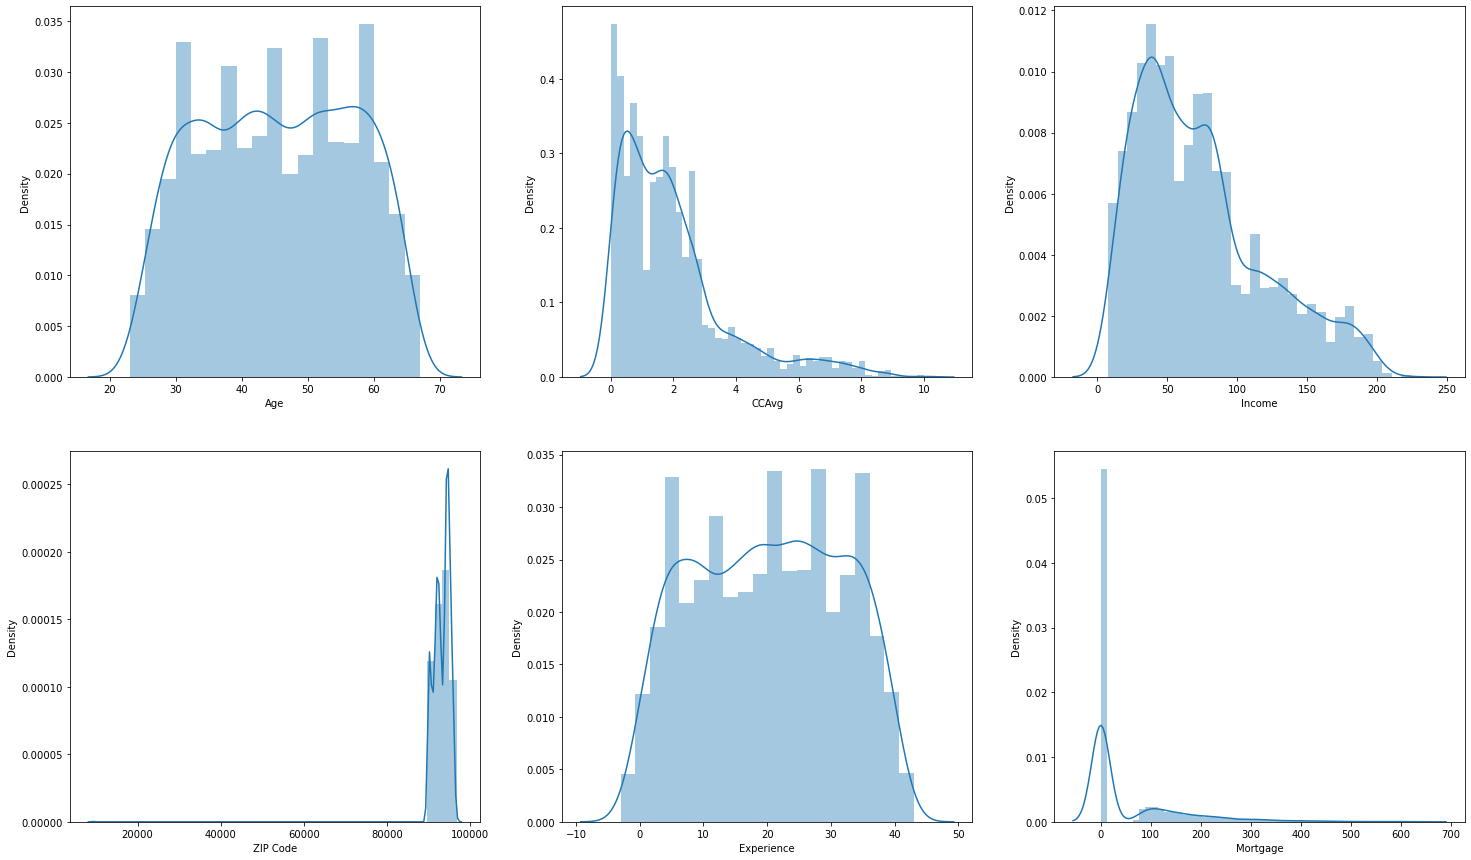

In [22]:
fi, axes = plt.subplots(2,3, figsize=(25,15), sharex=False, sharey=False)
for i,column in enumerate(non_categorical_cols):
    sns.distplot(thera_df[column], ax = axes[i%2,(i+3)%3])

    

<font color = 'blue'>
<li>Experience, CCAvg and Mortgage have 0 values</li>
<li>All 3 can have zero values and don't need to be imputed</li>
<li>Age, Experience are uniformly distributed mean ~= median</li>
<li> Income is right skewed</li>
<li>CC Avg is right skewed</li>
<li>Mortage is also skewed to the right - additionally Mortgage has a number of zero values</li>
<li>A bank will have skewed values for these variables - normalizing will destroy true relationships between the variables</li>
<li>ZIP Code is also skewed as discussed earlier and should drop this as this is not really numerical data and should be turned into categories (discussed later)</li>


In [23]:
thera_df[thera_df['Experience']<0].shape[0]

52

In [24]:
print(thera_df[thera_df['Experience']<0].Age.min(), thera_df[thera_df['Experience']<0].Age.max())

23 29


<font color = 'blue'>
52 rows with negative experience and all of them have age between 23 to 29 - need to clean
</font>

In [25]:
mean_experience = thera_df[thera_df.Experience>=0][(thera_df.Age>=23) & (thera_df.Age<=29)].Experience.mean()
print(mean_experience)

2.376146788990826


<font color = 'blue'>
mean of experience when age between 23 and 29 is ~2.33 (filtering out Experience <0) - we will use this to fill the experience rows that are negative
</font>

In [26]:
thera_df['Experience'] = thera_df.Experience.apply(lambda x: mean_experience if x < 0 else x)

In [27]:
thera_df.describe().T

count          mean          std     min      25%      50%  \
Age         5000.0     45.338400    11.463166    23.0     35.0     45.0   
Experience  5000.0     20.144312    11.399483     0.0     10.0     20.0   
Income      5000.0     73.774200    46.033729     8.0     39.0     64.0   
ZIP Code    5000.0  93152.503000  2121.852197  9307.0  91911.0  93437.0   
CCAvg       5000.0      1.937938     1.747659     0.0      0.7      1.5   
Mortgage    5000.0     56.498800   101.713802     0.0      0.0      0.0   

                75%      max  
Age            55.0     67.0  
Experience     30.0     43.0  
Income         98.0    224.0  
ZIP Code    94608.0  96651.0  
CCAvg           2.5     10.0  
Mortgage      101.0    635.0

In [28]:
thera_df[thera_df['Experience'] == 0]

Age  Experience  Income  ZIP Code Family  CCAvg Education  Mortgage  \
ID                                                                          
106    24         0.0      35     94704      3    0.1         2         0   
152    26         0.0     132     92834      3    6.5         3         0   
156    24         0.0      60     94596      4    1.6         1         0   
157    26         0.0      15     92131      4    0.4         1         0   
161    29         0.0     134     95819      4    6.5         3         0   
...   ...         ...     ...       ...    ...    ...       ...       ...   
4875   26         0.0      75     94061      3    0.3         3         0   
4902   26         0.0      54     96094      3    1.1         2         0   
4935   26         0.0      85     93950      2    1.6         3         0   
4944   26         0.0      12     96003      1    0.1         2         0   
4990   24         0.0      38     93555      1    1.0         3         0   

     Personal Loan Securities Account CD Account Online CreditCard  
ID                                                                  
106              0                  1          0      1          0  
152              1                  0          0      0          1  
156              0                  0          0      1          0  
157              0                  0          0      0          1  
161              1                  0          0      0          0  
...            ...                ...        ...    ...        ...  
4875             0                  0          0      0          0  
4902             0                  0          0      1          0  
4935             0                  0          0      1          1  
4944             0                  0          0      1          0  
4990             0                  0          0      1          0  

[66 rows x 13 columns]

In [29]:
thera_df[thera_df['CCAvg'] == 0]


Age  Experience  Income  ZIP Code Family  CCAvg Education  Mortgage  \
ID                                                                          
64     42        17.0      32     94523      4    0.0         2         0   
129    38        14.0      74     92182      2    0.0         1         0   
199    27         3.0      59     94123      4    0.0         1        90   
211    51        26.0      20     92131      2    0.0         1         0   
216    38        14.0      92     95818      2    0.0         1       249   
...   ...         ...     ...       ...    ...    ...       ...       ...   
4802   34        10.0      88     94404      2    0.0         1       121   
4827   56        31.0      81     93943      2    0.0         3       225   
4838   36        10.0     183     95348      2    0.0         1         0   
4911   48        22.0     120     90291      1    0.0         1         0   
4950   29         5.0      64     94114      4    0.0         1       249   

     Personal Loan Securities Account CD Account Online CreditCard  
ID                                                                  
64               0                  0          0      1          0  
129              0                  1          0      1          0  
199              0                  1          0      1          0  
211              0                  0          0      0          0  
216              0                  0          0      1          1  
...            ...                ...        ...    ...        ...  
4802             0                  0          0      1          0  
4827             0                  0          0      0          0  
4838             0                  0          0      0          0  
4911             0                  0          0      1          0  
4950             0                  0          0      0          1  

[106 rows x 13 columns]

In [30]:
thera_df[(thera_df.CCAvg==0) & (thera_df.CreditCard==1)]

Age  Experience  Income  ZIP Code Family  CCAvg Education  Mortgage  \
ID                                                                          
216    38        14.0      92     95818      2    0.0         1       249   
261    51        27.0      58     92407      1    0.0         1         0   
445    64        40.0      91     93106      2    0.0         3         0   
1074   33         8.0     122     94583      1    0.0         1         0   
1099   46        20.0     114     90720      1    0.0         1         0   
1477   61        37.0      64     92028      1    0.0         2         0   
1495   59        35.0      60     90089      1    0.0         2         0   
1507   52        27.0      25     95138      2    0.0         1         0   
1639   32         7.0     125     95133      1    0.0         1         0   
1792   48        22.0     139     94309      1    0.0         1         0   
1824   33         8.0     125     91320      1    0.0         1         0   
2238   30         5.0     134     92647      1    0.0         1         0   
2458   42        17.0      19     92115      2    0.0         3        85   
2864   29         5.0      70     93101      4    0.0         1         0   
2865   65        41.0      84     95762      2    0.0         3         0   
3165   28         4.0      82     95136      4    0.0         1         0   
3397   52        28.0      65     93106      1    0.0         1         0   
3403   64        40.0      95     90095      2    0.0         3         0   
3425   44        19.0      45     94539      4    0.0         2         0   
3533   38        12.0     141     94022      2    0.0         1         0   
3607   43        18.0       9     96145      2    0.0         3        96   
3630   50        26.0      82     95051      1    0.0         1         0   
3879   35        11.0      81     92064      2    0.0         1         0   
3935   35        11.0      68     94923      2    0.0         1       126   
3980   38        14.0      90     93010      2    0.0         1       258   
4682   27         3.0      68     95503      4    0.0         1         0   
4761   50        25.0      18     95819      2    0.0         1         0   
4950   29         5.0      64     94114      4    0.0         1       249   

     Personal Loan Securities Account CD Account Online CreditCard  
ID                                                                  
216              0                  0          0      1          1  
261              0                  0          0      0          1  
445              0                  0          0      1          1  
1074             0                  0          0      1          1  
1099             0                  0          0      1          1  
1477             0                  0          0      0          1  
1495             0                  0          0      1          1  
1507             0                  0          0      1          1  
1639             0                  0          0      1          1  
1792             0                  0          1      1          1  
1824             0                  0          0      1          1  
2238             0                  0          0      1          1  
2458             0                  0          0      1          1  
2864             0                  0          0      1          1  
2865             0                  0          0      1          1  
3165             0                  0          0      1          1  
3397             0                  0          0      1          1  
3403             0                  0          0      1          1  
3425             0                  0          0      1          1  
3533             0                  0          0      1          1  
3607             0                  0          0      1          1  
3630             0                  0          0      1          1  
3879             0                  0  

In [31]:
thera_df[(thera_df.CCAvg==0) & (thera_df.CreditCard==1)].shape

(28, 13)

In [32]:
thera_df[(thera_df.CCAvg>0) & (thera_df.CreditCard==0)]

Age  Experience  Income  ZIP Code Family  CCAvg Education  Mortgage  \
ID                                                                          
1      25         1.0      49     91107      4    1.6         1         0   
2      45        19.0      34     90089      3    1.5         1         0   
3      39        15.0      11     94720      1    1.0         1         0   
4      35         9.0     100     94112      1    2.7         2         0   
6      37        13.0      29     92121      4    0.4         2       155   
...   ...         ...     ...       ...    ...    ...       ...       ...   
4995   64        40.0      75     94588      3    2.0         3         0   
4996   29         3.0      40     92697      1    1.9         3         0   
4997   30         4.0      15     92037      4    0.4         1        85   
4998   63        39.0      24     93023      2    0.3         3         0   
4999   65        40.0      49     90034      3    0.5         2         0   

     Personal Loan Securities Account CD Account Online CreditCard  
ID                                                                  
1                0                  1          0      0          0  
2                0                  1          0      0          0  
3                0                  0          0      0          0  
4                0                  0          0      0          0  
6                0                  0          0      1          0  
...            ...                ...        ...    ...        ...  
4995             0                  0          0      1          0  
4996             0                  0          0      1          0  
4997             0                  0          0      1          0  
4998             0                  0          0      0          0  
4999             0                  0          0      1          0  

[3452 rows x 13 columns]

In [33]:
thera_df[thera_df['Mortgage'] == 0]

Age  Experience  Income  ZIP Code Family  CCAvg Education  Mortgage  \
ID                                                                          
1      25         1.0      49     91107      4    1.6         1         0   
2      45        19.0      34     90089      3    1.5         1         0   
3      39        15.0      11     94720      1    1.0         1         0   
4      35         9.0     100     94112      1    2.7         2         0   
5      35         8.0      45     91330      4    1.0         2         0   
...   ...         ...     ...       ...    ...    ...       ...       ...   
4995   64        40.0      75     94588      3    2.0         3         0   
4996   29         3.0      40     92697      1    1.9         3         0   
4998   63        39.0      24     93023      2    0.3         3         0   
4999   65        40.0      49     90034      3    0.5         2         0   
5000   28         4.0      83     92612      3    0.8         1         0   

     Personal Loan Securities Account CD Account Online CreditCard  
ID                                                                  
1                0                  1          0      0          0  
2                0                  1          0      0          0  
3                0                  0          0      0          0  
4                0                  0          0      0          0  
5                0                  0          0      0          1  
...            ...                ...        ...    ...        ...  
4995             0                  0          0      1          0  
4996             0                  0          0      1          0  
4998             0                  0          0      0          0  
4999             0                  0          0      1          0  
5000             0                  0          0      1          1  

[3462 rows x 13 columns]

In [34]:
print(f'No of customers with no credit card spending: {thera_df[thera_df.CCAvg==0].shape[0]}\n')

print(f'No of customers with no credit card spending even though they have credit cards: {thera_df[(thera_df.CCAvg==0) & (thera_df.CreditCard==1)].shape[0]}\n')

print(f'No of customers with no mortgages: {thera_df[thera_df.Mortgage==0].shape[0]}')

No of customers with no credit card spending: 106

No of customers with no credit card spending even though they have credit cards: 28

No of customers with no mortgages: 3462


<font color = 'blue'>
<li>Customers with no credit card spending: 106</li>
    <li>We note that CCAvg is > 0 for 3452 customers who dont have credit cards. Probably because they have credit cards with other banks. </li>
<li>Customers with no mortgages: 3462</li>


In [35]:
#dropping zip as discussed above
thera_df.drop('ZIP Code', axis=1, inplace=True)

### Bivariate Inspections

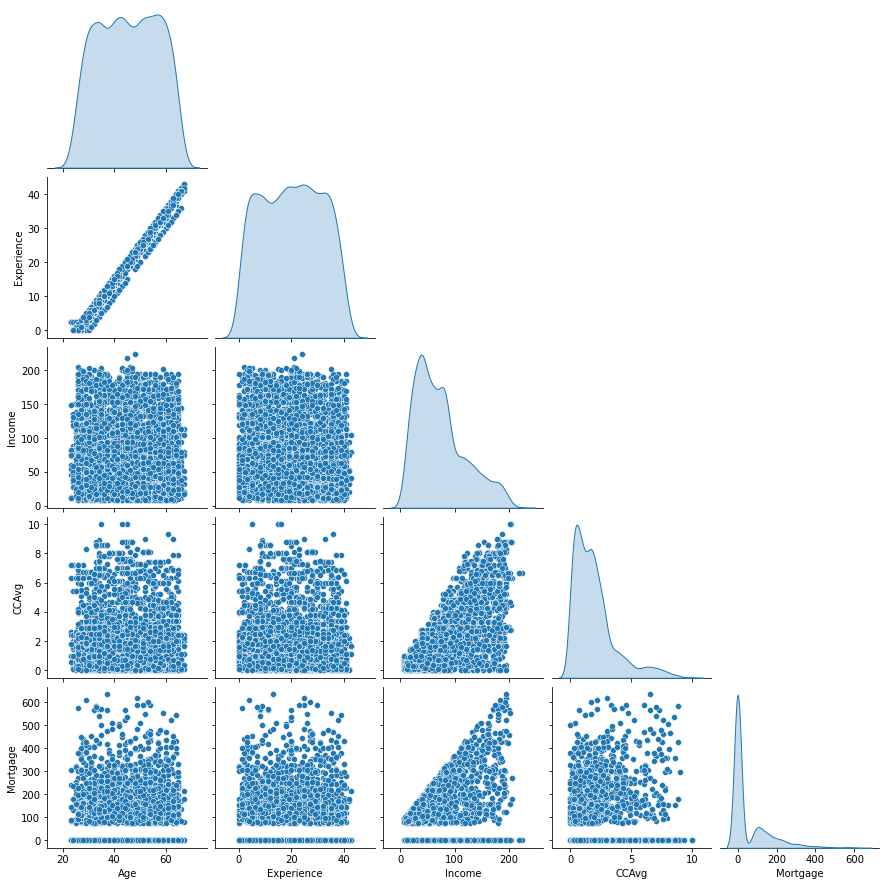

In [36]:
sns.pairplot(thera_df, corner=True, diag_kind='kde')

<AxesSubplot:>

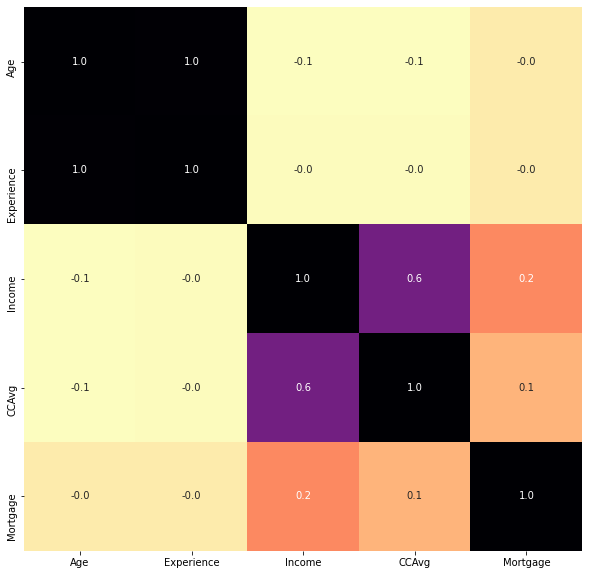

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(thera_df.corr(), annot=True, fmt='.1f', cmap='magma_r', cbar=False)

In [38]:
thera_df.groupby("Personal Loan").median()

Age  Experience  Income  CCAvg  Mortgage
Personal Loan                                           
0              45.0        20.0    59.0    1.4       0.0
1              45.0        20.0   142.5    3.8       0.0

In [39]:
thera_df.groupby("Personal Loan").mean()

Age  Experience      Income     CCAvg    Mortgage
Personal Loan                                                         
0              45.367257    20.17623   66.237389  1.729009   51.789381
1              45.066667    19.84375  144.745833  3.905354  100.845833

<font color ='blue'>
<li>Strong correlations are Age with Experience (correlation of 1.0) and Income with CCAvg (corr of 0.6)</li>
<li>Customers with Personal Loan have higher income that those without</li>
<li>Customers with Personal Loan have higher CCAvg that those without</li>
<li>Customers with Personal Loan have bigger mortages than those without, however since mortgage has overwhelmingly large no of zero values, the median value in both instances is 0</li>
<li>No significant trends with Personal Loan vs. Age or Experience</li>


In [40]:
x = {}
for column in categorical_cols[:-1]:
    #print(pd.crosstab(thera_df["Personal Loan"], thera_df[column], normalize='columns', margins=True).to_string(),'\n')
    x[column] = pd.crosstab(thera_df["Personal Loan"],thera_df[column],  normalize='columns', margins=True)
    display(x[column])
    print('\n')



Family               1        2         3         4    All
Personal Loan                                             
0              0.92731  0.91821  0.868317  0.890344  0.904
1              0.07269  0.08179  0.131683  0.109656  0.096

Education            1         2         3    All
Personal Loan                                    
0              0.95563  0.870278  0.863424  0.904
1              0.04437  0.129722  0.136576  0.096

Securities Account         0         1    All
Personal Loan                                
0                   0.906208  0.885057  0.904
1                   0.093792  0.114943  0.096

CD Account            0         1    All
Personal Loan                           
0              0.927629  0.536424  0.904
1              0.072371  0.463576  0.096

Online               0        1    All
Personal Loan                         
0              0.90625  0.90248  0.904
1              0.09375  0.09752  0.096

CreditCard            0         1    All
Personal Loan                           
0              0.904533  0.902721  0.904
1              0.095467  0.097279  0.096

<font color='blue'>
<li>Increase in customers with Personal Loan with increase in: Education, Family (although a dip is seen as family size increases from 3 to 4) and CD Account</li>
<li>More customers with Personal Loan when they also have: Securities Account (smaller effect than above 3)</li>
<li>No significant effect with Online, Credit Card</li>


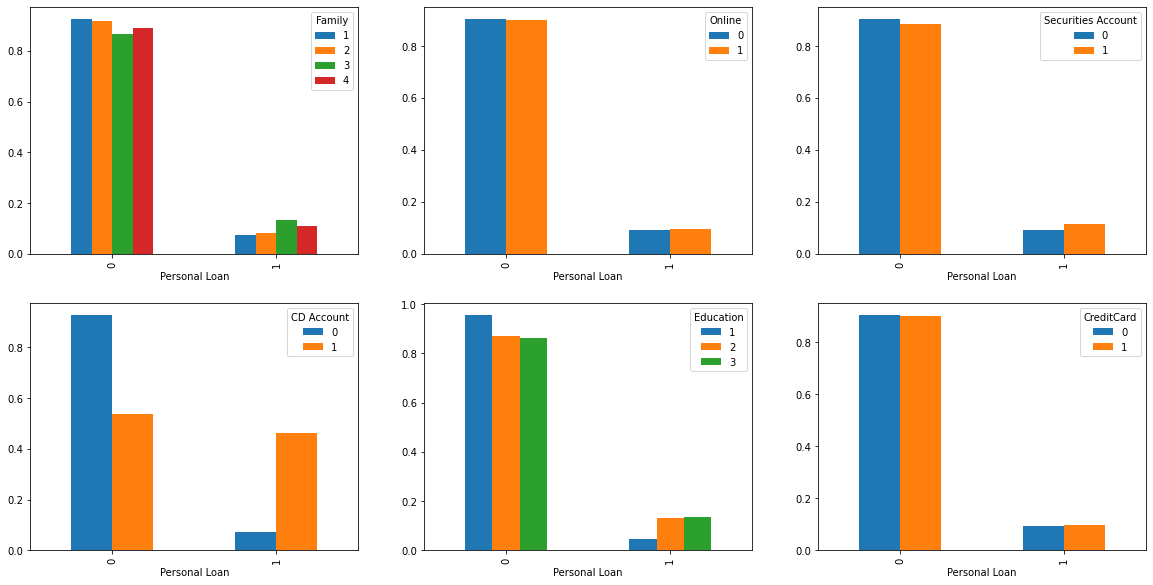

In [41]:
fig, axes = plt.subplots(2,3, figsize=(20,10), sharex=False, sharey=False)
for i, key in enumerate(x):
    x[key].drop('All', axis=1).plot(kind='bar',  ax = axes[i%2,(i+3)%3])


In [62]:
#Code Source: https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

#"Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity."
#source: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_check_df = thera_df.drop(['Personal Loan'], axis = 1) # dropping target 

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_check_df.columns
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(vif_check_df.values, i) 
                          for i in range(len(vif_check_df.columns))] 

del(vif_check_df) #clean up memory since not used later
vif_data

feature        VIF
0                  Age  76.227614
1           Experience  29.927803
2               Income   6.516583
3               Family   5.491308
4                CCAvg   3.848918
5            Education   6.571198
6             Mortgage   1.375565
7   Securities Account   1.269119
8           CD Account   1.413590
9               Online   2.569561
10          CreditCard   1.565979

<font color = 'blue'>
<li>We can see very high VIF values for Age and Experience - although age has a higher VIF, I drop Experience since it had incorrect data initially (<0)
<li>We note that as per links shared above - there are different schools of thought on whether or not to drop one of the multicollinear columns


## Modelling

In [61]:
from sklearn.model_selection import train_test_split

X = thera_df.drop(['Personal Loan','Experience'], axis=1) #dropping target and dropping Experience as highly correlated to Age
#X = X_full.drop(['ZIP Code'], axis=1) #running model without zip code given earlier discussion -> will inspect later to see if it actually helped to do so
X = pd.get_dummies(X, columns=['Family','Education'], drop_first=True)
X_cols = X.columns
y = thera_df['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=314159)

X_train.head()
print(X_cols)
X_train


Index(['Age', 'Income', 'CCAvg', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Family_2', 'Family_3',
       'Family_4', 'Education_2', 'Education_3'],
      dtype='object')


Age  Income  CCAvg  Mortgage Securities Account CD Account Online  \
ID                                                                        
9      35      81    0.6       104                  0          0      1   
2135   50      68    1.5       120                  0          0      1   
1038   35      40    2.4         0                  1          0      1   
4469   67      51    2.2         0                  0          0      1   
4704   57      62    2.0         0                  0          0      1   
...   ...     ...    ...       ...                ...        ...    ...   
3651   47      93    0.8       107                  0          0      0   
2386   43     125    3.5         0                  0          0      0   
1502   30      35    0.3         0                  1          0      0   
2816   26      48    2.6       169                  0          0      0   
3084   40      78    2.4         0                  1          1      1   

     CreditCard  Family_2  Family_3  Family_4  Education_2  Education_3  
ID                                                                       
9             0         0         1         0            1            0  
2135          1         0         0         0            1            0  
1038          0         0         0         0            1            0  
4469          1         0         1         0            0            0  
4704          0         0         1         0            0            1  
...         ...       ...       ...       ...          ...          ...  
3651          0         1         0         0            0            1  
2386          0         0         0         1            1            0  
1502          1         1         0         0            1            0  
2816          0         0         1         0            0            1  
3084          0         0         0         1            0            0  

[3500 rows x 13 columns]

In [44]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(thera_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(thera_df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [45]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(thera_df.loc[thera_df['Personal Loan'] == 1]), (len(thera_df.loc[thera_df['Personal Loan'] == 1])/len(thera_df.index)) * 100))
print("Original Personal Loan False Values    : {0} ({1:0.2f}%)".format(len(thera_df.loc[thera_df['Personal Loan'] == 0]), (len(thera_df.loc[thera_df['Personal Loan'] == 0])/len(thera_df.index)) * 100))
print("\n")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values    : 4520 (90.40%)


Training Personal Loan True Values    : 341 (9.74%)
Training Personal Loan False Values   : 3159 (90.26%)

Test Personal Loan True Values        : 139 (9.27%)
Test Personal Loan False Values       : 1361 (90.73%)



<font color='blue'>
<li>Our data seems uniformly split with ratio of target variable values broadly similar across the dataset, training set and test set</li>


In [46]:
from sklearn import metrics, svm
from sklearn.metrics import recall_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(fit_intercept=False, max_iter=1000) #increasing iterations for better accruacy
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)

model
#coef_df = pd.DataFrame(model.coef_, columns=X_cols)
#coef_df['intercept'] = model.intercept_
#print('The coefficients predicted by the model are:')
#coef_df.sort_values(by=0)

LogisticRegression(fit_intercept=False, max_iter=1000)

In [47]:
## Feature Importance or Coefficients 
print('The coefficients predicted by the model are:')

fi = pd.DataFrame()
fi['Column'] = X_train.columns
fi['Coeff'] = abs(model.coef_[0])
fi.sort_values(by='Coeff',ascending=False)


The coefficients predicted by the model are:


Column     Coeff
5           CD Account  3.960382
7           CreditCard  1.457337
4   Securities Account  1.360718
12         Education_3  1.223893
11         Education_2  1.202068
8             Family_2  1.115521
6               Online  1.110703
10            Family_4  0.250847
0                  Age  0.106702
2                CCAvg  0.058921
1               Income  0.026657
9             Family_3  0.003449
3             Mortgage  0.000165

In [48]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9413333333333334


In [49]:
y_test.value_counts(normalize=True)

0    0.907333
1    0.092667
Name: Personal Loan, dtype: float64

<font color='blue'>
Broadly predicted values have similar split in target variable as in the observed data
</font>

## Confusion Matrix and Metrics

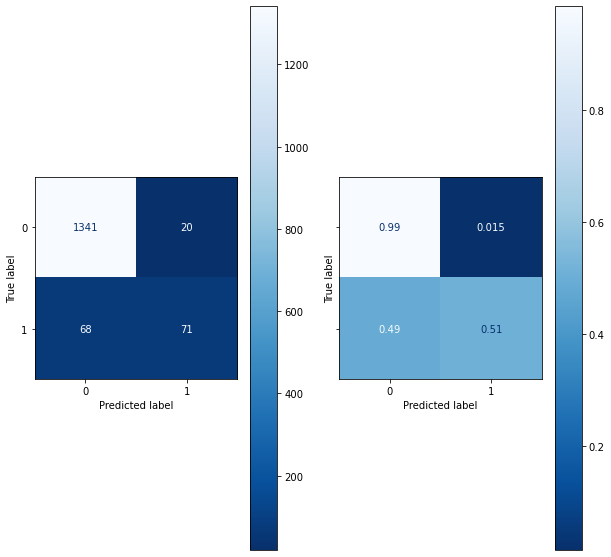

In [50]:
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(10,10))
#plt.figure(figsize=(10,10), dpi=300)
metrics.plot_confusion_matrix(model, X_test, y_test, cmap='Blues_r', ax=axes[0]);

metrics.plot_confusion_matrix(model, X_test, y_test, cmap='Blues_r', ax=axes[1], normalize='true');
plt.savefig('cm.jpg')

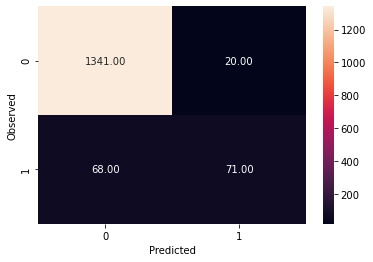

In [51]:
#Alternate method to show confusion matrix using heatmap as requested in project steps and tasks
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.show()

In [52]:
TN, FP, FN, TP = confusion_matrix(y_test, y_predict).ravel()
TNR = TN/(TN+FP)
FPR = 1-TNR

# correcting auc score to use predicted values, not classes
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html indicates that y_test and probabilities (not the thresholded values) are to be passed as second parameter
# Have discussed with Niall Whelan who agrees with this approach
x={'model_auc':metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:,1]),
'model_recall_sensitivity_TPR':recall_score(y_test, y_predict),
'model_accuracy':metrics.accuracy_score(y_test, y_predict),
'model_precision':metrics.precision_score(y_test, y_predict),
'model_f1':metrics.f1_score(y_test, y_predict),
'model_logloss':metrics.log_loss(y_test, y_predict),
'Specificity_TNR':TNR, 
'FPR': FPR}

score_df = pd.DataFrame(x, index=['Metrics'])
print('sklearn model metrics are:')
score_df = score_df.T
score_df

sklearn model metrics are:


Metrics
model_auc                     0.908061
model_recall_sensitivity_TPR  0.510791
model_accuracy                0.941333
model_precision               0.780220
model_f1                      0.617391
model_logloss                 2.026286
Specificity_TNR               0.985305
FPR                           0.014695

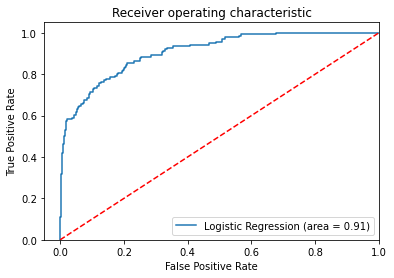

In [53]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_prob = model.predict_proba(X_test)[:,1]


# correcting roc curve and auc score to use predicted values, not classes
# Have discussed with Niall Whelan who agrees with this approach


logit_roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

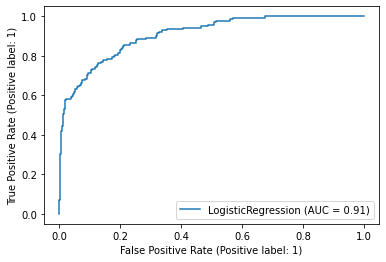

In [54]:
#Alt method of plotting roc curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, X_test, y_test)

In [55]:
comparison_df = X_test.copy()
#comparison_df
comparison_df['Observed Personal Loan'] = y_test
#comparison_df
comparison_df['Predicted Personal Loan'] = y_predict
filter_df = comparison_df[comparison_df['Observed Personal Loan'] != comparison_df['Predicted Personal Loan']]
print('Rows where prediction doesnt match observed in test set:')
display(filter_df)

Rows where prediction doesnt match observed in test set:


Age  Income  CCAvg  Mortgage Securities Account CD Account Online  \
ID                                                                        
322    44     101    4.4        82                  0          0      0   
460    35     200    3.0       458                  0          0      0   
4293   63     191    4.3       205                  0          0      0   
3743   32     181    6.0         0                  0          1      1   
443    58     122    3.0       115                  0          0      1   
...   ...     ...    ...       ...                ...        ...    ...   
966    62     135    5.2         0                  0          0      1   
4308   45     128    6.0         0                  0          0      1   
1519   43      64    3.0       221                  0          0      1   
3544   37     194    0.0         0                  0          0      0   
1766   26     149    7.2       154                  0          0      0   

     CreditCard  Family_2  Family_3  Family_4  Education_2  Education_3  \
ID                                                                        
322           0         0         1         0            1            0   
460           0         1         0         0            0            0   
4293          0         1         0         0            0            1   
3743          1         0         0         0            0            0   
443           0         0         0         0            0            1   
...         ...       ...       ...       ...          ...          ...   
966           0         1         0         0            1            0   
4308          0         0         0         1            0            1   
1519          0         0         0         1            0            1   
3544          0         1         0         0            0            0   
1766          0         1         0         0            0            0   

     Observed Personal Loan  Predicted Personal Loan  
ID                                                    
322                       1                        0  
460                       0                        1  
4293                      1                        0  
3743                      0                        1  
443                       1                        0  
...                     ...                      ...  
966                       1                        0  
4308                      1                        0  
1519                      1                        0  
3544                      0                        1  
1766                      0                        1  

[88 rows x 15 columns]

In [56]:
print(f'Number of rows where prediction doesnt match observed in test data: {filter_df.shape[0]}')
del(filter_df) #clean up memory since note used later

Number of rows where prediction doesnt match observed in test data: 88


## Testing with dropping columns 

In [57]:
def runWithDroppedColumn(column, X, y, score_df):
    if column != None:
        X2 = X.drop(column, axis = 1)
    else:
        X2=X
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size=0.3, random_state=314159)
    model2 = LogisticRegression(fit_intercept=False)
    model2.fit(X2_train, y2_train)
    #predict on test
    y2_predict = model2.predict(X2_test)

    TN, FP, FN, TP = confusion_matrix(y2_test, y2_predict).ravel()
    TNR = TN/(TN+FP)
    FPR = 1-TNR

    x2={'model_auc':metrics.roc_auc_score(y2_test, model2.predict_proba(X2_test)[:,1]),
    'model_recall_sensitivity_TPR':recall_score(y2_test,y2_predict),
    'model_accuracy':metrics.accuracy_score(y2_test, y2_predict),
    'model_precision':metrics.precision_score(y2_test, y2_predict),
    'model_f1':metrics.f1_score(y2_test, y2_predict),
    'model_logloss':metrics.log_loss(y2_test, y2_predict),
    'Specificity_TNR':TNR, 
    'FPR': FPR}
    

    if column == None:
        score_df2=pd.DataFrame(x2,index=['All columns']).T
        return score_df2
    else:
        score_df2=pd.DataFrame(x2,index=[f'-{column}']).T
        merged_score_df = score_df.copy()
        merged_score_df[f'-{column}'] = score_df2
    
    return merged_score_df

In [58]:
merged_score_df = runWithDroppedColumn(None, X, y, pd.DataFrame())
for column in X.columns:
    #print(column)
    merged_score_df = runWithDroppedColumn(column, X, y, merged_score_df)
    #display(score_df)

merged_score_df.T

model_auc  model_recall_sensitivity_TPR  model_accuracy  \
All columns           0.907627                      0.517986        0.941333   
-Age                  0.721613                      0.151079        0.869333   
-Income               0.843101                      0.316547        0.925333   
-CCAvg                0.906919                      0.517986        0.941333   
-Mortgage             0.908055                      0.510791        0.942000   
-Securities Account   0.901702                      0.517986        0.940667   
-CD Account           0.872644                      0.482014        0.933333   
-Online               0.887932                      0.496403        0.935333   
-CreditCard           0.898778                      0.496403        0.936667   
-Family_2             0.903398                      0.496403        0.936667   
-Family_3             0.906734                      0.517986        0.942000   
-Family_4             0.907997                      0.525180        0.940000   
-Education_2          0.903467                      0.460432        0.936667   
-Education_3          0.897140                      0.446043        0.934000   

                     model_precision  model_f1  model_logloss  \
All columns                 0.774194  0.620690       2.026286   
-Age                        0.212121  0.176471       4.513108   
-Income                     0.721311  0.440000       2.578904   
-CCAvg                      0.774194  0.620690       2.026286   
-Mortgage                   0.788889  0.620087       2.003259   
-Securities Account         0.765957  0.618026       2.049312   
-CD Account                 0.705263  0.572650       2.302600   
-Online                     0.718750  0.587234       2.233522   
-CreditCard                 0.734043  0.592275       2.187469   
-Family_2                   0.734043  0.592275       2.187469   
-Family_3                   0.782609  0.623377       2.003260   
-Family_4                   0.752577  0.618644       2.072339   
-Education_2                0.761905  0.573991       2.187466   
-Education_3                0.738095  0.556054       2.279571   

                     Specificity_TNR       FPR  
All columns                 0.984570  0.015430  
-Age                        0.942689  0.057311  
-Income                     0.987509  0.012491  
-CCAvg                      0.984570  0.015430  
-Mortgage                   0.986040  0.013960  
-Securities Account         0.983835  0.016165  
-CD Account                 0.979427  0.020573  
-Online                     0.980162  0.019838  
-CreditCard                 0.981631  0.018369  
-Family_2                   0.981631  0.018369  
-Family_3                   0.985305  0.014695  
-Family_4                   0.982366  0.017634  
-Education_2                0.985305  0.014695  
-Education_3                0.983835  0.016165

In [59]:
precision_diff = merged_score_df.T['model_precision']
precision_diff = precision_diff - precision_diff[0]
precision_diff.sort_values()

-Age                  -0.562072
-CD Account           -0.068930
-Online               -0.055444
-Income               -0.052882
-CreditCard           -0.040151
-Family_2             -0.040151
-Education_3          -0.036098
-Family_4             -0.021616
-Education_2          -0.012289
-Securities Account   -0.008236
All columns            0.000000
-CCAvg                 0.000000
-Family_3              0.008415
-Mortgage              0.014695
Name: model_precision, dtype: float64

<font color='blue'>
<li>Examining this for our metric of focus, Precision, we see that the most impact on precision (negatively) is by removing age, cd account, online, income, credit card, family, education
<li>This is useful in case we have missing data we can prioritise collecting data for the variables with the most negative impact on precision


<AxesSubplot:>

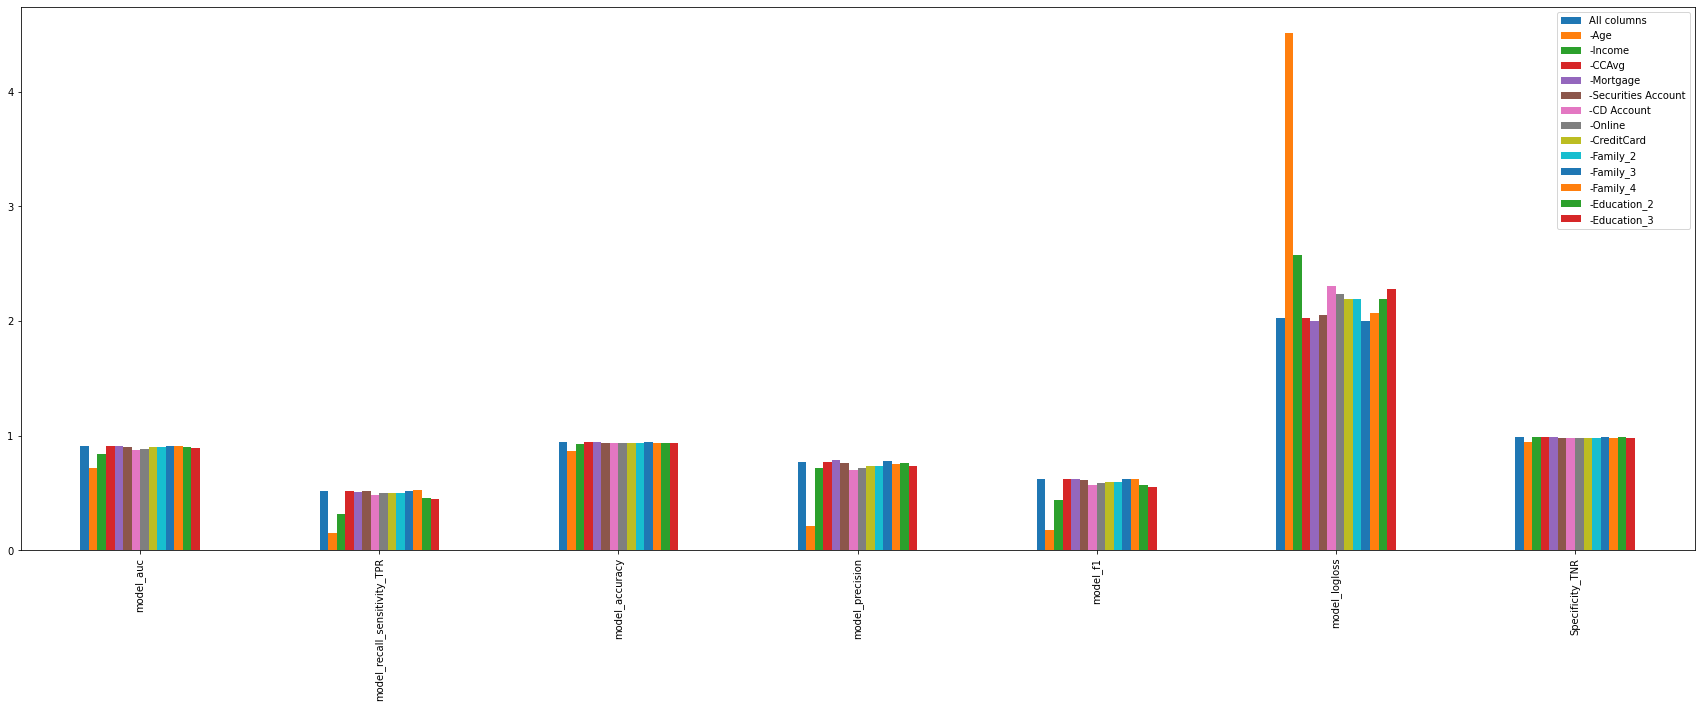

In [60]:

merged_score_df.iloc[:7,:].plot(kind='bar', stacked = False,figsize=(30,10))

<font color = blue>
<h2> Business Implications/ Summary</h2>
<h3> Confusion matrix observations</h3>
<li> True Positive (observed=1,predicted=1): 71
    <li> In the test set, the model _correctly_ predicted these customers would take a Personal Loan 
<li> False Positive (observed=0,predicted=1): 20
    <li> In the test set, the model _incorrectly_ predicted these customers would take a Personal Loan 
<li> True Negative (observed=0,predicted=0): 1,341
    <li> In the test set, the model _correctly_ predicted these customers would not take a Personal Loan 
<li> False Negative (observed=1,predicted=0): 68
    <li> In the test set, the model _incorrectly_ predicted these customers would not take a Personal Loan 




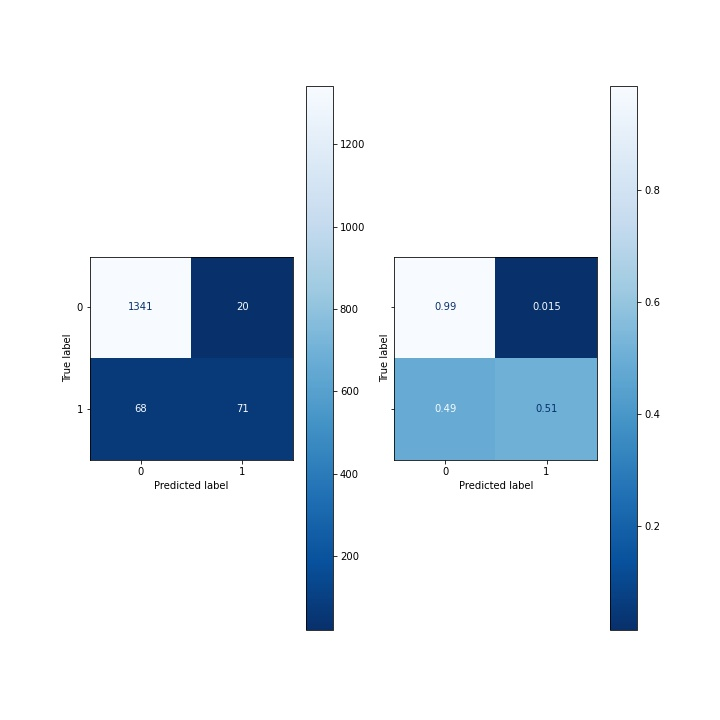

<font color ='blue'>
<h3>Feature Importance</h3>
<li> CD Account, Credit Card, Securities Account, Education, Family, Online (aggregating for all the dummy columns of Education and Family) are the top features which influence the model's output (based on the coefficients).
<li>Using the alternate method (dropping column by column), the most significant columns are: age, cd account, online, income, credit card, family, education
<h3>Important Metric</h3>
<li> In this scenario the bank wants to find those who are likely to take a Personal Loan based on the customers' other relationships with the bank as well as other data the bank has on the customers such as age
<li> The aim is to target marketing at the most likely customers ('positives') - marketing budgets are limited and most effective use would be to focus on groups that will most likely take the loan
<li> We don't want to waste marketing effort and money on people unlikely to take the loan ('negatives')
    <li> On Precision our model works well at 0.78 (meaning there is a high proportion of true positives in our predicted data meaning true negatives on whom our marketing money would have been wasted are a relatively low proportion in the predicted set)
    <li> On Specificity (= 0.99) our model does well too as we manage to remove most of the negatives on whom marketing money would have been wasted. However given the large skew towards Personal Loan = 0, this is not necessarily an indicator of a good model on its own
    <li> Recall is 0.51 meaning that we do end up missing a fairly large number of positives
    <li>AUC score of 0.91 also gives confidence that the model is well fitted 


<font color='blue'>
<li> Therefore it does a reasonable job of removing people who are not likely to take personal loans and we can avoid wasting marketing money on them
<li> However, it misses several customers who may take loans (recall is not as very high)
<li> To handle ZIP Code, one possible solution may be to bin zip codes into low income, medium income and high income categories and then use the categories instead of zip code to run the model. Since the data to bin zipcodes into groups by income category is not available, we dropped ZIP code
<li> Please refer table above for metrics when model is run with all columns and when any one column is dropped
<h4>To summarise, the model will help in focusing ad spends but a separate credit appraisal process will be needed to identify which customers really should get the loan.</h3>
<h3>What if we retain Experience</h3>
<li>as per link here, multicollinearity is not always a bad thing: "Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity."</li>
<a href='https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/'>multicollinearity-in-regression-analysis</a>
<li>So if we retain Experience, the confusion matrix would be: TP, TN, FP, FN = 96,1348,13,43 and model scores are: auc	0.97, recall 0.69, accuracy	0.96, precision 0.88


# Thera Bank Personal Loan Campaign
 
## Data Description:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 
## Domain:

Banking

 
## Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.
Attribute Information:

    ID: Customer ID
    Age: Customer's age in completed years
    Experience: #years of professional experience
    Income: Annual income of the customer ($000)
    ZIP Code: Home Address ZIP
    Family: Family size of the customer
    CCAvg: Avg. spending on credit cards per month ($000)
    Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
    Mortgage: Value of house mortgage if any. ($000)
    Personal Loan: Did this customer accept the personal loan offered in the last campaign?
    Securities Account: Does the customer have a securities account with the bank?
    CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
    Online: Does the customer use internet banking facilities?
    Credit card: Does the customer use a credit card issued by the bank?

 
## Learning Outcomes:

    Exploratory Data Analysis
    Preparing the data to train a model
    Training and making predictions using a classification model
    Model evaluation

 
## Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.

 
## Steps and tasks:

    1.  Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
    2.  EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

    * Number of unique in each column?
    * Number of people with zero mortgage?
    * Number of people with zero credit card spending per month?
    * Value counts of all categorical columns.
    * Univariate and Bivariate
    * Get data model ready

    3.  Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
    4.  Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

    5.  Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
    6.  Give conclusion related to the Business understanding of your model? (5 marks)
